# Importing Libraries



In [ ]:
# mlp for the two circles problem
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset


# Genearting Data and Model ...
 
Here we are creating 2d Circles and making a model using tensorflow

Model Has
*   Dense layer with 50 nodes and input size which is 2 also relu as activation function
*   Last layer is Output layer with 1 output size and sigmoid as activation function

Next plotting training and testing accuracies after fitting the mode



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train: 0.842, Test: 0.838


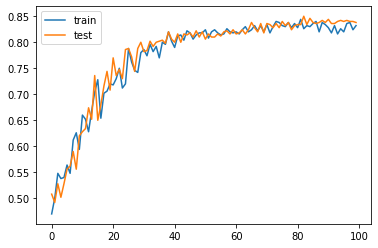

In [ ]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Using Batch Normalization...
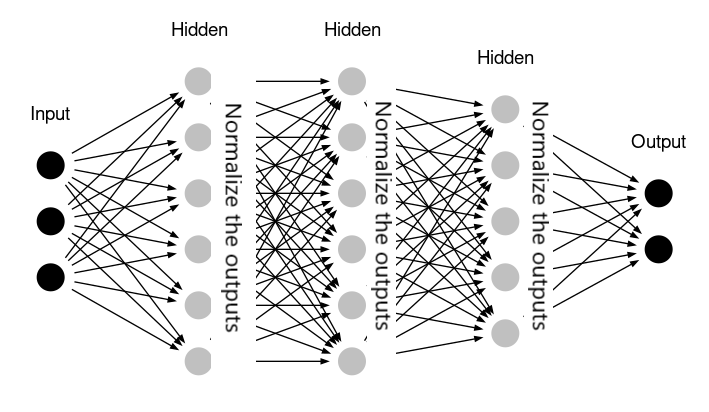

We normalize the outputs of each layer and then send it to the next layer.
Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

Training Deep Neural Networks is complicated by the fact that the distribution of each layer’s inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities.

**How does Batch Normalization work?**
Since by now we have a clear idea of why we need Batch normalization, let’s understand how it works. It is a two-step process. First, the input is normalized, and later rescaling and offsetting is performed.

**Normalization of the Input**
Normalization is the process of transforming the data to have a mean zero and standard deviation one. In this step we have our batch input from layer h, first, we need to calculate the mean of this hidden activation.

Normalization of the Input

Here, m is the number of neurons at layer h.

Once we have meant at our end, the next step is to calculate the standard deviation of the hidden activations.

hidden activations

Further, as we have the mean and the standard deviation ready. We will normalize the hidden activations using these values. For this, we will subtract the mean from each input and divide the whole value with the sum of standard deviation and the smoothing term (ε).

The smoothing term(ε) assures numerical stability within the operation by stopping a division by a zero value.

smoothing term(ε)
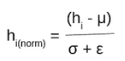

**Rescaling of Offsetting**

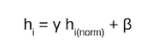


In the final operation, the re-scaling and offsetting of the input take place. Here two components of the BN algorithm come into the picture, γ(gamma) and β (beta). These parameters are used for re-scaling (γ) and shifting(β) of the vector containing values from the previous operations.

Rescaling or Offsetting

These two are learnable parameters, during the training neural network ensures the optimal values of γ and β are used. That will enable the accurate normalization of each batch.


Advantages:

* By Normalizing the hidden layer activation the Batch normalization speeds up the training process.
* It solves the problem of internal covariate shift. Through this, we ensure that the input for every layer is distributed around the same mean and standard deviation.

# Initial Discoveries

We can clearly see that above neural network did not use batch normalization which makes it hard and takes lot of time to train it

In [ ]:
#MLP with batch normalization 
# Sigmoid as activation function
# define model
from keras.layers import Dense
from keras.layers import BatchNormalization
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train: 0.828, Test: 0.838


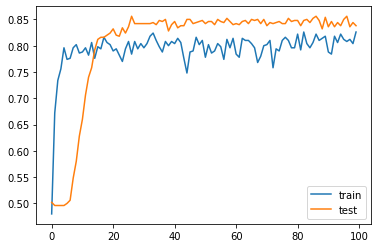

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Relu as activation function
model = Sequential()
model.add(Dense(50, input_dim=2, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train: 0.820, Test: 0.810


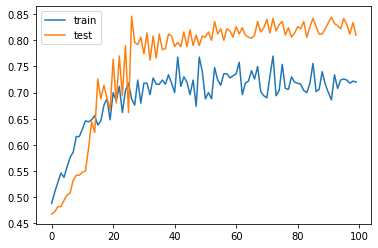

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Conclusion
We can clearly see that batching of the outputs of a layer and passing to the other layer takes less time and has got good accuracy when compared to that of neural network which doesn't use batch normalization. By Normalizing the hidden layer activation the Batch normalization speeds up the training process.It solves the problem of internal covariate shift. Through this, we ensure that the input for every layer is distributed around the same mean and standard deviation. 